In [2]:
%matplotlib inline

from SSA import SSA

import numpy as np
from numpy import pi
import matplotlib.pyplot as plt
import pandas as pd

plt.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = (12, 6)

## London. SSA for Time Series (L = 30 years)

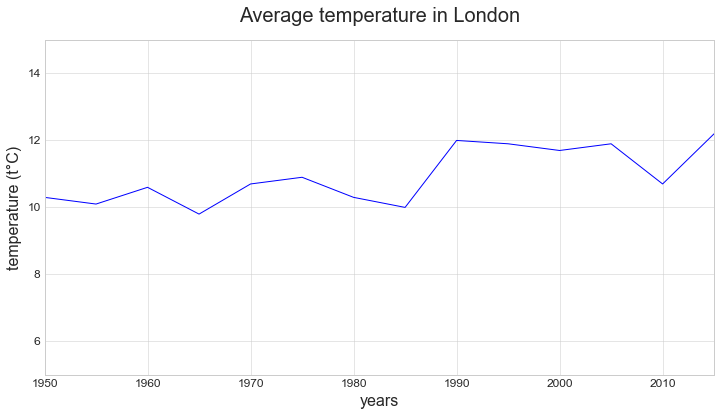

In [111]:
london_df = pd.read_csv('cities_data/london.csv', index_col=0, usecols=["0"] + 
                        [str(1950 + k * 5) for k in range(0, 14)]).transpose()
london_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in London", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(5, 15)
plt.legend().remove()
plt.show();

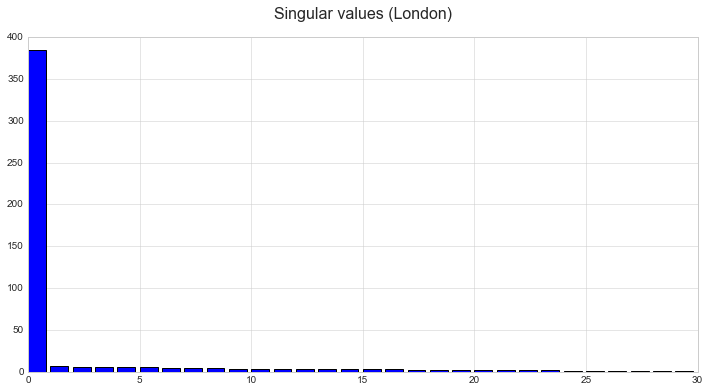

In [18]:
london_df = pd.read_csv('cities_data/london.csv', index_col=0).transpose()

ssa_london = SSA(london_df.ix[:,0], 30)
london_comps = ssa_london.components_to_df()

plt.title("Singular values (London)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_london.d), ssa_london.Sigma[:30]);

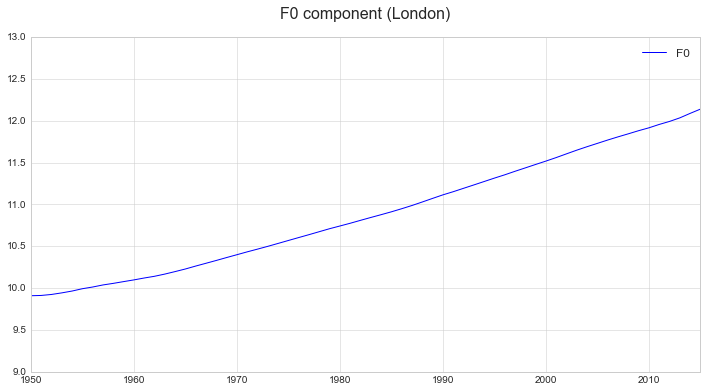

In [167]:
plt.xlim(1950, 2015)
plt.ylim(9, 13)

plt.title("F0 component (London)", fontsize="16", y=1.04)
plt.plot(london_comps.iloc[:,0])
plt.legend();

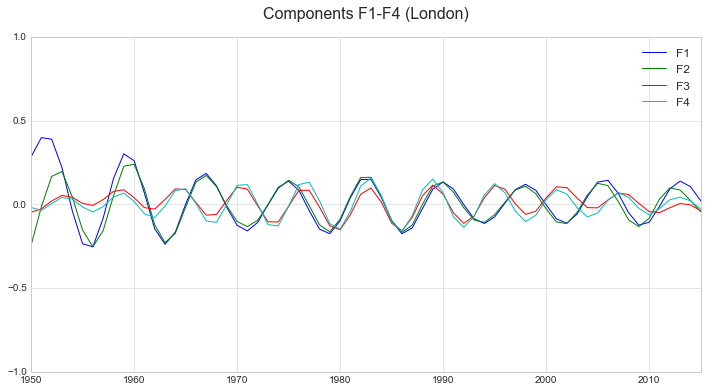

In [140]:
plt.xlim(1950, 2015)
plt.ylim(-1, 1)

plt.title("Components F1-F4 (London)", fontsize="16", y=1.04)
for i in range(1, 5):
    plt.plot(london_comps.iloc[:,i])
plt.legend();

## Paris. SSA for Time Series (L = 50 years)

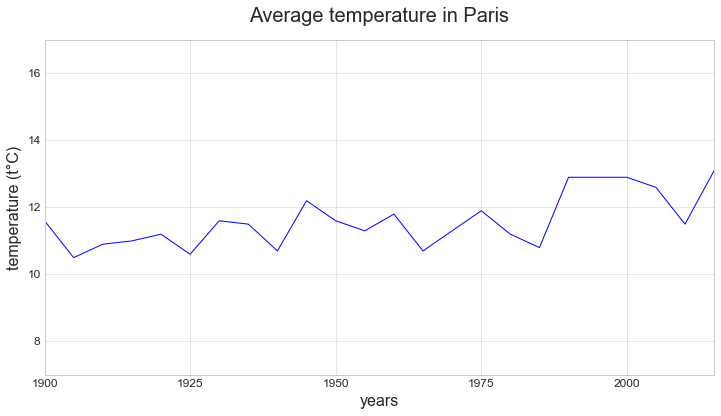

In [34]:
paris_df = pd.read_csv('cities_data/paris.csv', index_col=0, usecols=["0"] +
                       [str(1900 + k * 5) for k in range(0, 24)]).transpose()
paris_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Paris", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(7, 17)
plt.legend().remove();

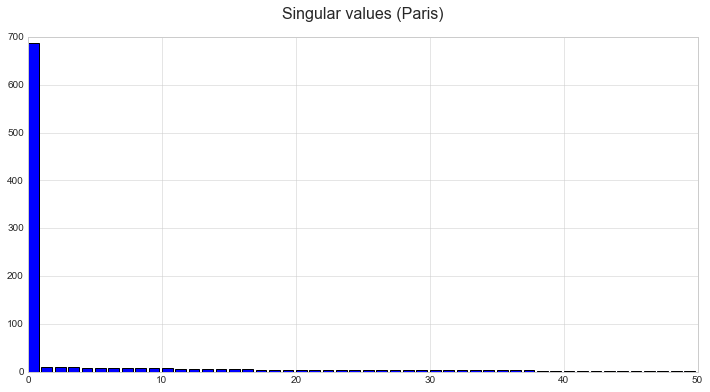

In [35]:
paris_df = pd.read_csv('cities_data/paris.csv', index_col=0).transpose()

ssa_paris = SSA(paris_df.ix[:,0], 50)
paris_comps = ssa_paris.components_to_df()

plt.title("Singular values (Paris)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_paris.d), ssa_paris.Sigma[:50]);

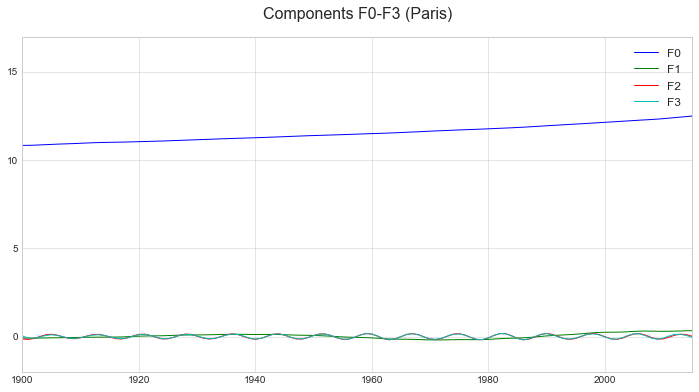

In [42]:
plt.xlim(1900, 2015)
plt.ylim(-2, 17)

plt.title("Components F0-F3 (Paris)", fontsize="16", y=1.04)
for i in range(4):
    plt.plot(paris_comps.iloc[:,i])
plt.legend();

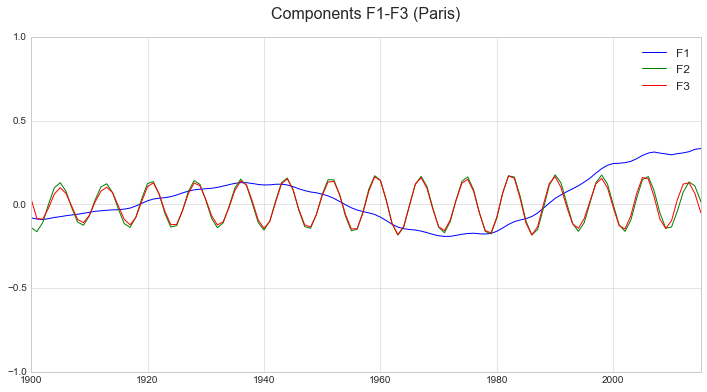

In [40]:
plt.xlim(1900, 2015)
plt.ylim(-1, 1)

plt.title("Components F1-F3 (Paris)", fontsize="16", y=1.04)
for i in range(1, 4):
    plt.plot(paris_comps.iloc[:,i])
plt.legend();

## Sydney. SSA for Time Series (L = 75 years)

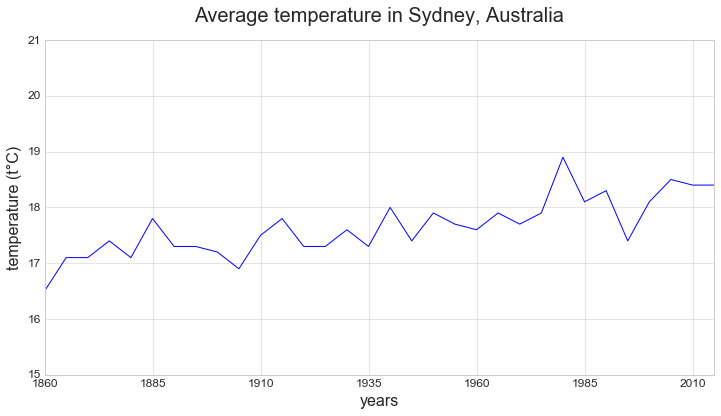

In [170]:
sydney_df = pd.read_csv('cities_data/sydney.csv', index_col=0, usecols=["0"] +
                        [str(1860 + k * 5) for k in range(0, 32)]).transpose()
sydney_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Sydney, Australia", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(15, 21)
plt.legend().remove();

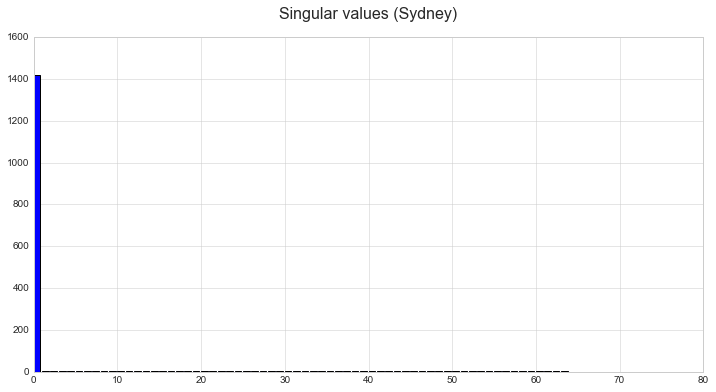

In [21]:
sydney_df = pd.read_csv('cities_data/sydney.csv', index_col=0).transpose()

ssa_sydney = SSA(sydney_df.ix[:,0], 75)
sydney_comps = ssa_sydney.components_to_df()

plt.title("Singular values (Sydney)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_sydney.d), ssa_sydney.Sigma[:75]);

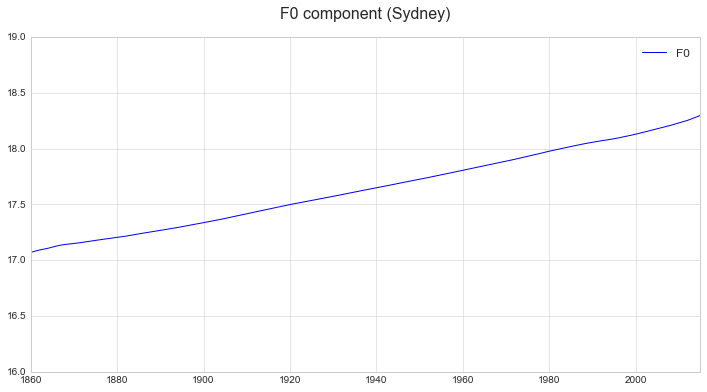

In [176]:
plt.xlim(1860, 2015)
plt.ylim(16, 19)

plt.title("F0 component (Sydney)", fontsize="16", y=1.04)
plt.plot(sydney_comps.iloc[:,0])
plt.legend();

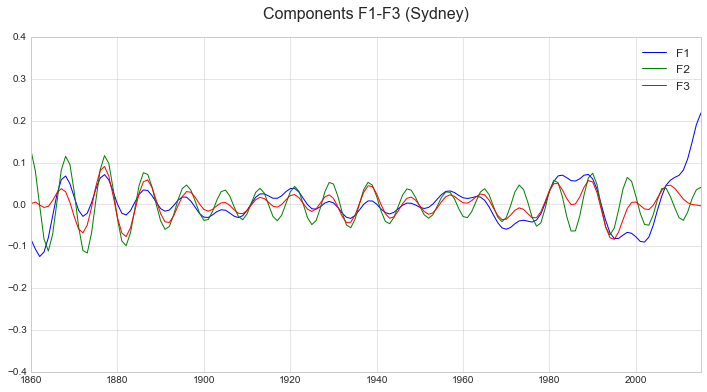

In [181]:
plt.xlim(1860, 2015)
plt.ylim(-0.4, 0.4)

plt.title("Components F1-F3 (Sydney)", fontsize="16", y=1.04)
for i in range(1, 4):
    plt.plot(sydney_comps.iloc[:,i])
plt.legend();

## Moscow. SSA for Time Series (L = 5 years)

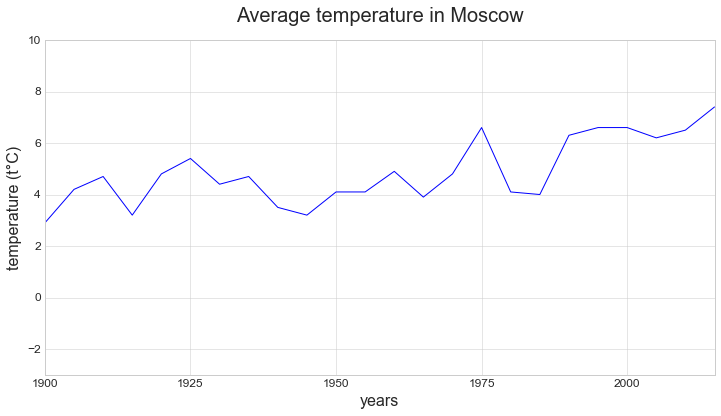

In [7]:
moscow_df = pd.read_csv('cities_data/moscow.csv', index_col=0, usecols=["0"] +
                        [str(1900 + k * 5) for k in range(0, 24)]).transpose()
moscow_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Moscow", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(-3, 10)
plt.legend().remove();

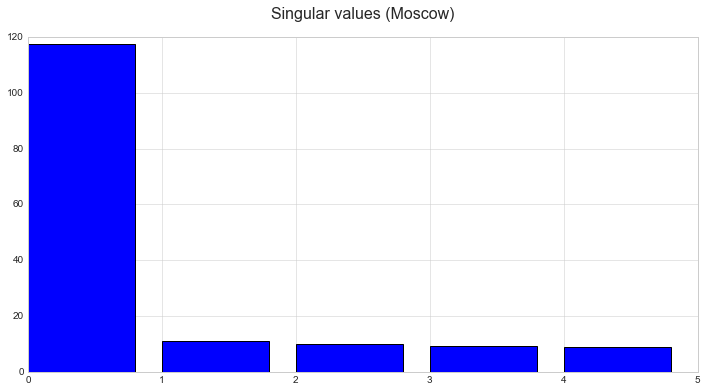

In [11]:
moscow_df = pd.read_csv('cities_data/moscow.csv', index_col=0).transpose()

ssa_moscow = SSA(moscow_df.ix[:,0], 5)
moscow_comps = ssa_moscow.components_to_df()

plt.title("Singular values (Moscow)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_moscow.d), ssa_moscow.Sigma[:5]);

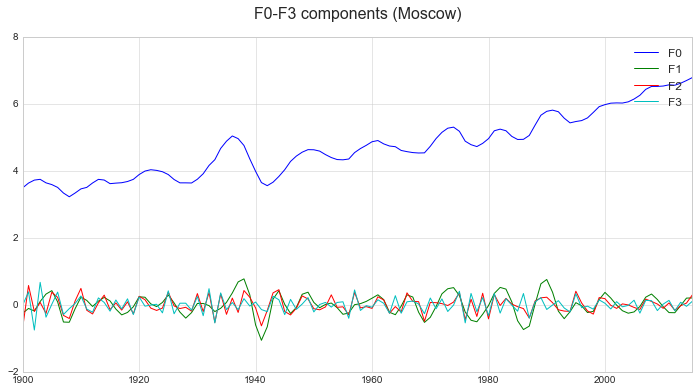

In [17]:
plt.xlim(1900, 2015)
plt.ylim(-2, 8)

plt.title("F0-F3 components (Moscow)", fontsize="16", y=1.04)
for i in range(4):
    plt.plot(moscow_comps.iloc[:,i])
plt.legend();

## Yakutsk. SSA for Time Series (L = 10 years)

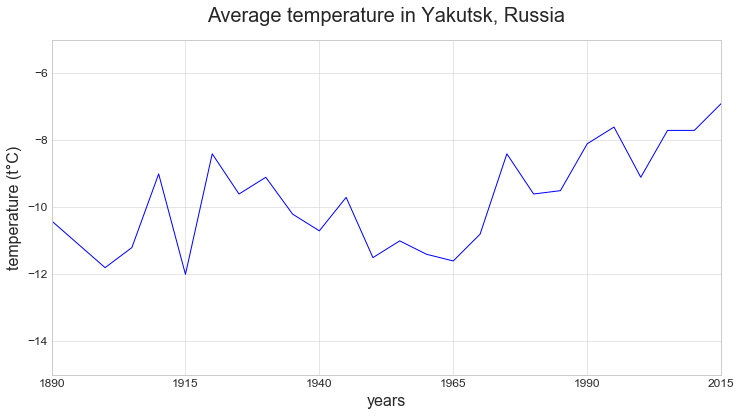

In [110]:
yakutsk_df = pd.read_csv('cities_data/yakutsk.csv', index_col=0, usecols=["0"] +
                         [str(1890 + k * 5) for k in range(0, 26)]).transpose()
yakutsk_df.plot(kind='line', fontsize="12")

plt.title("Average temperature in Yakutsk, Russia", fontsize="20", y=1.04)
plt.xlabel('years', fontsize="16")
plt.ylabel('temperature (t°C)', fontsize="16")

plt.ylim(-15, -5)
plt.legend().remove();

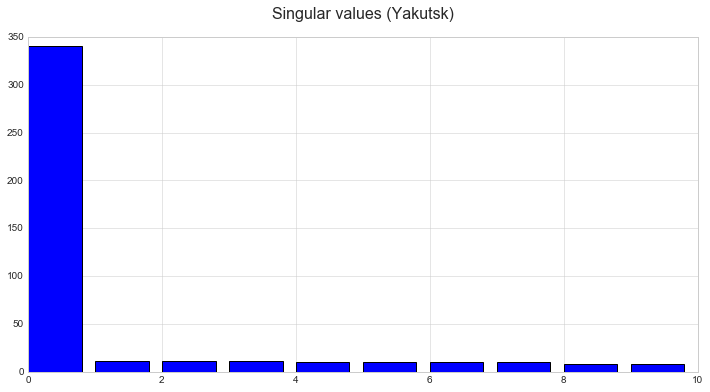

In [23]:
yakutsk_df = pd.read_csv('cities_data/yakutsk.csv', index_col=0).transpose()

ssa_yakutsk = SSA(yakutsk_df.ix[:,0], 10)
yakutsk_comps = ssa_yakutsk.components_to_df()

plt.title("Singular values (Yakutsk)", fontsize="16", y=1.04)
plt.bar(np.arange(ssa_yakutsk.d), ssa_yakutsk.Sigma[:10]);

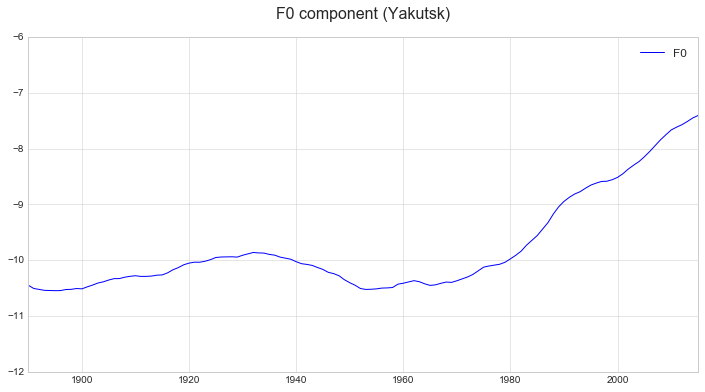

In [24]:
plt.xlim(1890, 2015)
plt.ylim(-12, -6)

plt.title("F0 component (Yakutsk)", fontsize="16", y=1.04)
plt.plot(yakutsk_comps.iloc[:,0])
plt.legend();

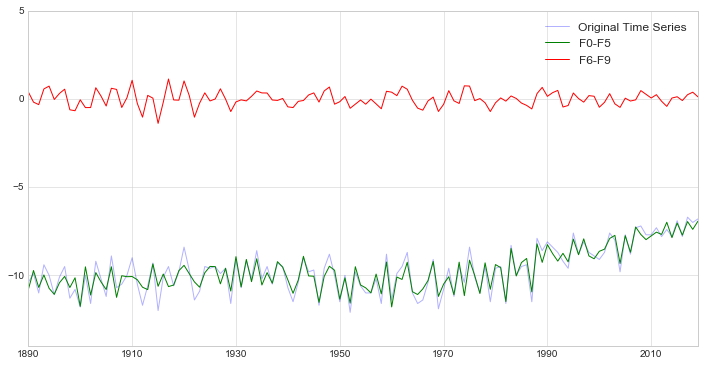

In [85]:
plt.xlim(1890, 1920)
plt.ylim(-14, 5)

ssa_yakutsk.orig_TS.plot(alpha=0.3)
ssa_yakutsk.reconstruct(slice(6)).plot()
ssa_yakutsk.reconstruct(slice(6, 10)).plot()
plt.legend(["Original Time Series", "F0-F5", "F6-F9"]);

## Temperature trends for London, Paris and Sydney

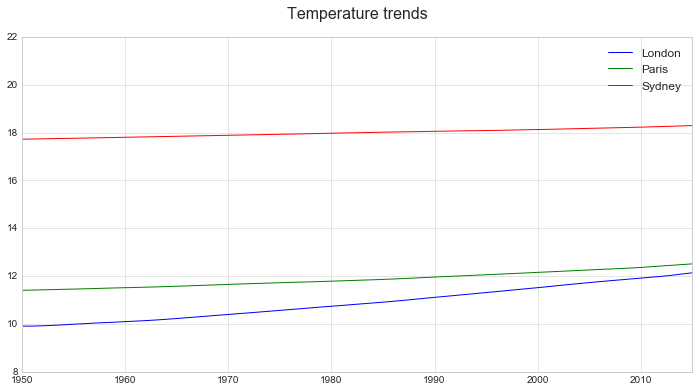

In [82]:
plt.xlim(1950, 2015)
plt.ylim(8, 22)

plt.title("Temperature trends", fontsize="16", y=1.04)
plt.plot(london_comps.iloc[:,0])
plt.plot(paris_comps.iloc[:,0])
plt.plot(sydney_comps.iloc[:,0])
plt.legend(["London", "Paris", "Sydney"]);

## Temperature trends for Yakutsk and Moscow

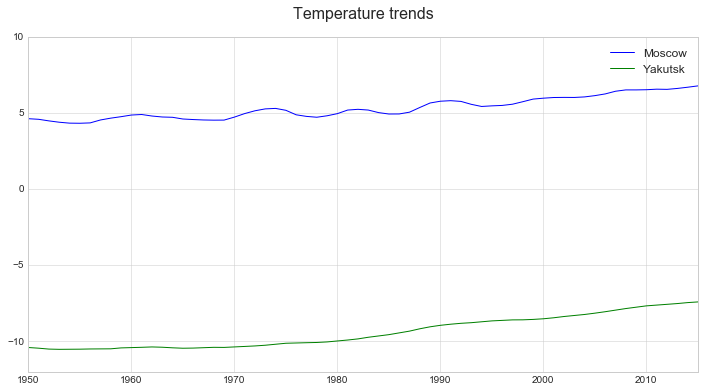

In [84]:
plt.xlim(1950, 2015)
plt.ylim(-12, 10)

plt.title("Temperature trends", fontsize="16", y=1.04)
plt.plot(moscow_comps.iloc[:,0])
plt.plot(yakutsk_comps.iloc[:,0])
plt.legend(["Moscow", "Yakutsk"]);